Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [2]:
dataset = pd.read_csv(r'Fire_sensors.csv')
dataset.head()

,Temperature[C],Humidity[%],CO,Smoke,LPG,Flame
0,15.127,42.98,426,937.420,3338,0
1,27.107,54.80,400,939.799,1087,0
2,26.370,45.80,409,937.376,1860,0
3,25.980,48.42,431,937.333,3009,0
4,-1.197,41.36,400,937.556,935,0


In [3]:
test_set = pd.read_csv(r'test_dataset.csv')
test_set.head()

,Temperature[C],Humidity[%],CO,Smoke,LPG
0,17.511,49.00,438,937.384,2779
1,3.621,48.39,438,937.338,2471
2,21.796,47.45,400,939.627,2085
3,-4.361,50.28,400,939.387,8177
4,25.380,48.42,444,938.788,24512


In [4]:
dataset['Flame'].value_counts()

,count
Flame,
0,3616
1,1384


In [5]:
dataset.shape

(5000, 6)

In [6]:
dataset.isna().sum()

,0
Temperature[C],0
Humidity[%],0
CO,0
Smoke,0
LPG,0
Flame,0


In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset.describe()

,Temperature[C],Humidity[%],CO,Smoke,LPG,Flame
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000
mean,18.110401,45.203978,812.972400,938.301047,5460.9154,0.276800
std,14.718275,11.061795,2439.687295,1.347339,6245.1457,0.447462
min,-22.010000,10.800000,400.000000,930.872000,0.0000,0.000000
25%,12.716750,42.605000,400.000000,937.379000,1466.0000,0.000000
50%,20.290000,47.910000,400.000000,938.705500,2983.0000,0.000000
75%,26.400000,52.100000,424.000000,939.618000,5606.5000,1.000000
max,59.930000,74.890000,39059.000000,939.850000,24961.0000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  5000 non-null   float64
 1   Humidity[%]     5000 non-null   float64
 2   CO              5000 non-null   int64  
 3   Smoke           5000 non-null   float64
 4   LPG             5000 non-null   int64  
 5   Flame           5000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 234.5 KB


Exploratory Data Analysis(EDA)

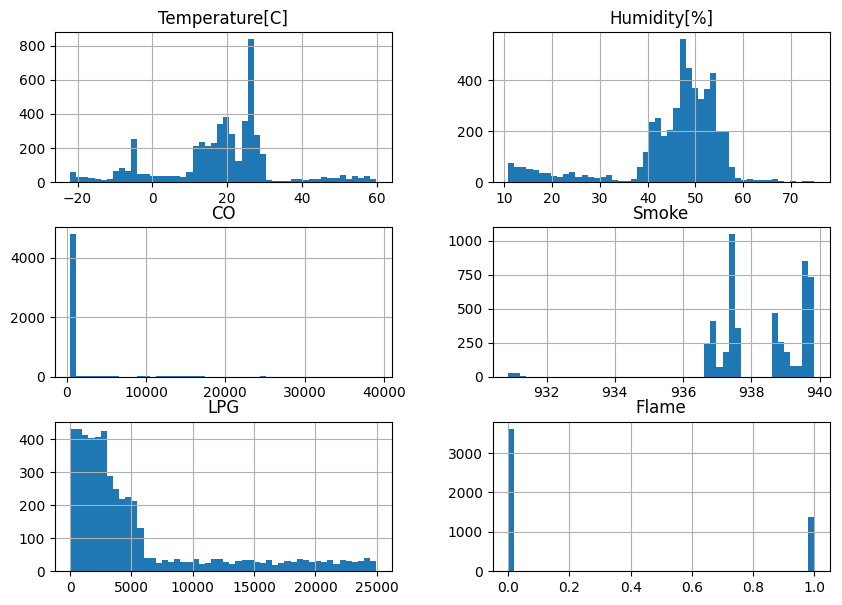

In [10]:
dataset.hist(bins=50, figsize=(10,7))
plt.show()

<Axes: >

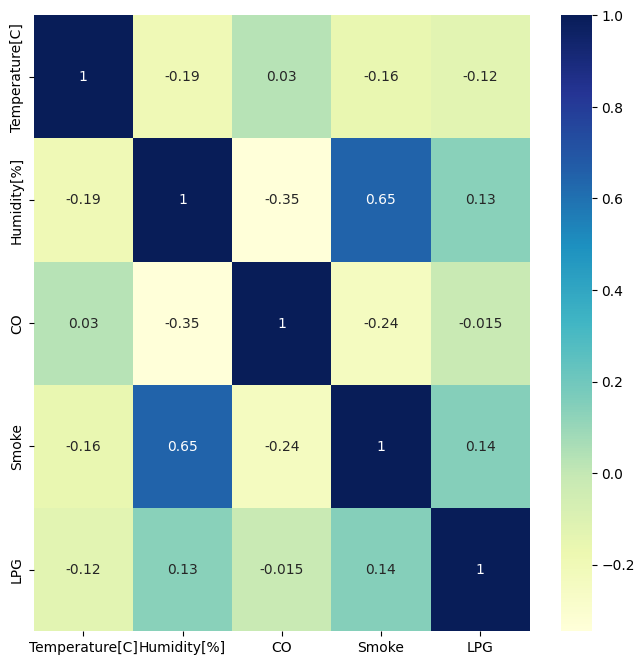

In [11]:
import seaborn as sns
# Explore data visually
# Build Correlation Matrix to study multi collinearity

correlation = dataset.iloc[:,:5].corr()
#print(correlation)

fig , ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
sns.heatmap(correlation,annot=True,cmap="YlGnBu")

In [12]:
# defining the features and labels


X = dataset.drop('Flame', axis=1)
y = dataset['Flame']

In [13]:
# importing some other important libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Splited the dataset into training and testing dataset

x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x_train)
scaled_test_set = scaler.transform(X_test)

In [16]:
scaled_features

array([[-0.26697064,  0.05901543, -0.17070506,  0.9992019 , -0.42555847],
       [ 0.57379903,  0.00216462, -0.16180315, -0.68176613, -0.58681859],
       [ 0.75538197, -0.40661983, -0.17070506, -0.5638565 , -0.74467522],
       ...,
       [ 0.64019876,  0.23678704, -0.15775683, -0.74147677, -0.4950867 ],
       [ 0.51688497,  0.35229346, -0.16099389, -0.72182517, -0.44678971],
       [-0.02793161, -0.21892189, -0.16544484, -0.71124354, -0.35635438]])

In [17]:
scaled_test_set

array([[-0.01688757,  0.82695267, -0.17070506,  0.9992019 , -0.47709688],
       [ 0.73099023, -0.34254986, -0.17070506, -0.71653435, -0.52004556],
       [ 0.00350663,  0.12489019, -0.17070506, -1.05816994, -0.2091944 ],
       ...,
       [-0.31026598,  0.08969683, -0.17070506, -0.78531497, -0.25424999],
       [ 0.56363581,  0.10954949, -0.17070506, -0.57972895, -0.72149915],
       [ 0.05344194,  0.48675016, -0.17070506,  1.021121  , -0.36445791]])

In [18]:
scaled_features.shape, scaled_test_set.shape

((4000, 5), (1000, 5))

In [19]:
# Train the model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
isolation_forest.fit(scaled_features)

# Predict anomalies on the test set
test_anomalies = isolation_forest.predict(scaled_test_set)

test_anomalies[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
test_anomalies.shape

(1000,)

In [21]:
# Map predictions to descriptive labels
test_anomalies_mapped = pd.Series(test_anomalies).map({1: 'Normal', -1: 'Anomaly'})
test_anomalies_mapped[:5]

,0
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal


In [22]:
test_anomalies_mapped.value_counts()

,count
Normal,941
Anomaly,59


In [23]:
test_anomalies_mapped.isna().sum()

0

In [24]:
# Store x_test with features

test_results = pd.DataFrame(X_test, columns=['Temperature[C]','Humidity[%]','CO','Smoke','LPG'])
test_results.reset_index(drop=True, inplace=True)
test_results.head()

,Temperature[C],Humidity[%],CO,Smoke,LPG
0,17.822,54.30,400,939.623,2475
1,28.860,41.34,400,937.353,2210
2,18.123,46.52,400,936.901,4128
3,27.140,47.31,400,938.717,18750
4,20.570,47.36,400,939.655,2666


In [25]:
test_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  1000 non-null   float64
 1   Humidity[%]     1000 non-null   float64
 2   CO              1000 non-null   int64  
 3   Smoke           1000 non-null   float64
 4   LPG             1000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [26]:
test_results['anomaly'] = test_anomalies_mapped
test_results.head(15)

,Temperature[C],Humidity[%],CO,Smoke,LPG,anomaly
0,17.822,54.30,400,939.623,2475,Normal
1,28.860,41.34,400,937.353,2210,Normal
2,18.123,46.52,400,936.901,4128,Normal
3,27.140,47.31,400,938.717,18750,Normal
4,20.570,47.36,400,939.655,2666,Normal
5,-4.081,42.11,401,937.403,1775,Normal
6,-5.956,49.42,400,939.619,6807,Normal
7,15.582,46.78,400,939.644,2671,Normal
8,22.639,52.92,400,939.619,1990,Normal
9,12.078,47.14,422,938.804,15570,Normal


In [52]:
isolation_forest.predict(scaler.transform([[20.360,48.16,400,939.641,2605]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [51]:
scaler.transform([[20.360,48.16,400,939.641,2605]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.15507419,  0.2728828 , -0.17070506,  1.01280686, -0.45602772]])

In [53]:
# Assuming `scaler` was fitted on the training dataset and saved
def pred(new_data, scaler=scaler, model=isolation_forest):
    # Standardize the new data using the pre-fitted scaler
    scaled_test_set = scaler.transform(new_data)
    print("Scaled Test Data:", scaled_test_set)

    # Predict anomalies using the trained model
    test_anomalies = model.predict(scaled_test_set)
    return test_anomalies



In [54]:
# Example usage
# Predict for new data
predictions = pred(X_test)
print(predictions[:20])

Scaled Test Data: [[-0.01688757  0.82695267 -0.17070506  0.9992019  -0.47709688]
 [ 0.73099023 -0.34254986 -0.17070506 -0.71653435 -0.52004556]
 [ 0.00350663  0.12489019 -0.17070506 -1.05816994 -0.2091944 ]
 ...
 [-0.31026598  0.08969683 -0.17070506 -0.78531497 -0.25424999]
 [ 0.56363581  0.10954949 -0.17070506 -0.57972895 -0.72149915]
 [ 0.05344194  0.48675016 -0.17070506  1.021121   -0.36445791]]
[ 1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1]


In [35]:
 # Map the predictions
test_anomalies_mapped = pd.Series(pred(X_test)).map({1: 'Normal', -1: 'Anomaly'})

In [37]:
test_anomalies_mapped[:10]

,0
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal
5,Normal
6,Normal
7,Normal
8,Normal
9,Normal


In [57]:
# Map predictions (-1 = anomaly, 1 = normal) to match labels (0 = normal, 1 = anomaly)
mapped_predictions = [1 if pred == -1 else 0 for pred in predictions]

# Calculate confusion matrix
cm = confusion_matrix(y_test, mapped_predictions)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[683  38]
 [258  21]]


In [58]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, mapped_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.704


In [63]:
X_test.columns

Index(['Temperature[C]', 'Humidity[%]', 'CO', 'Smoke', 'LPG'], dtype='object')

In [62]:
import pickle
with open('isolation_model.pkl', 'wb') as file:
    pickle.dump(isolation_forest, file)

In [64]:
import json
columns = {
    'data_columns' : [col.lower() for col in X_test.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

Building a model to predicted the occurance of fire

In [ ]:
y_train

,Flame
4227,0
4676,0
800,0
3671,0
4193,0
...,...
4426,0
466,0
3092,0
3772,0


In [59]:
# import the LogisticRegression model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [60]:
logreg_accuracy = model.score(X_test, y_test)

In [61]:
print(f"Accuracy of Logistic Regression Model ---> {logreg_accuracy}")

Accuracy of Logistic Regression Model ---> 0.966


In [ ]:
logreg_predict = model.predict(X_test)
logreg_predict[:10]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
# checking the accuracy with mse
mean_squared_error(y_test, logreg_predict)

0.034

In [ ]:
# using confusing metrics to evaluate the

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, logreg_predict)
print(cm)

[[717   4]
 [ 30 249]]


In [65]:
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(logreg_accuracy, file)

Importing the Test dataset
* Fire Alarm - 0 = less chance of
* fire alarm 1= more chance of fire alarm

In [ ]:
test_set = pd.read_csv(r'test_dataset.csv')
test_set.head()

,Temperature[C],Humidity[%],CO,Smoke,LPG
0,17.511,49.00,438,937.384,2779
1,3.621,48.39,438,937.338,2471
2,21.796,47.45,400,939.627,2085
3,-4.361,50.28,400,939.387,8177
4,25.380,48.42,444,938.788,24512


In [ ]:
# y_pred = model.predict(test_set)[:10]
# y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
# model.classes_

array([0, 1])

In [ ]:
# # Define your mapping
# class_mapping = {0: "Less chance of fire alarm", 1: "High chance of fire alarm"}

# # Example prediction
# y_pred  # Replace X with your test data

# # Map the prediction to the descriptive labels
# mapped_prediction = [class_mapping[label] for label in y_pred]

# # Print the mapped predictions
# for prediction in mapped_prediction:
#     print(prediction)
# # print(mapped_prediction)


Less chance of fire alarm
Less chance of fire alarm
Less chance of fire alarm
High chance of fire alarm
High chance of fire alarm
High chance of fire alarm
Less chance of fire alarm
Less chance of fire alarm
High chance of fire alarm
Less chance of fire alarm


In [ ]:
# chance_of_fire = pd.Series(mapped_prediction, name='Chance of fire')

In [ ]:
# Final_results = pd.concat([test_results, chance_of_fire], axis=1)
# Final_results.head(10)

,Temperature[C],Humidity[%],CO,Smoke,LPG,anomaly,Chance of fire
0,17.822,54.30,400,939.623,2475,Normal,Less chance of fire alarm
1,28.860,41.34,400,937.353,2210,Normal,Less chance of fire alarm
2,18.123,46.52,400,936.901,4128,Normal,Less chance of fire alarm
3,27.140,47.31,400,938.717,18750,Normal,High chance of fire alarm
4,20.570,47.36,400,939.655,2666,Normal,High chance of fire alarm
5,-4.081,42.11,401,937.403,1775,Normal,High chance of fire alarm
6,-5.956,49.42,400,939.619,6807,Normal,Less chance of fire alarm
7,15.582,46.78,400,939.644,2671,Normal,Less chance of fire alarm
8,22.639,52.92,400,939.619,1990,Normal,High chance of fire alarm
9,12.078,47.14,422,938.804,15570,Normal,Less chance of fire alarm


In [ ]:
def unified_model(new_data):
    new_data = pd.DataFrame(new_data, columns=['Temperature[C]','Humidity[%]','CO','Smoke','LPG'])
    # Logistic Algorithm on the test dataset
    logreg_predict = model.predict(new_data)

    # Mapping the prediction
    class_mapping = {0: "Less chance of fire occurance", 1: "High chance of fire occurance"}
    mapped_prediction = [class_mapping[label] for label in logreg_predict]

    # Anomaly detection
    # Predict anomalies on the test set
    test_anomalies = isolation_forest.predict(new_data)
    test_anomalies = np.where(test_anomalies == -1, 'Anomaly', 'Normal')


    # Combine results into a DataFrame
    results = pd.DataFrame(new_data, columns=['Temperature[C]','Humidity[%]','CO','Smoke','LPG'])
    results.reset_index(drop=True, inplace=True)
    results['Anomaly'] = test_anomalies
    results['Fire_Alart'] = mapped_prediction

    return results

In [ ]:
output = unified_model(test_set)
output.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


,Temperature[C],Humidity[%],CO,Smoke,LPG,Anomaly,Fire_Alart
0,17.511,49.00,438,937.384,2779,Anomaly,Less chance of fire occurance
1,3.621,48.39,438,937.338,2471,Anomaly,Less chance of fire occurance
2,21.796,47.45,400,939.627,2085,Anomaly,Less chance of fire occurance
3,-4.361,50.28,400,939.387,8177,Anomaly,High chance of fire occurance
4,25.380,48.42,444,938.788,24512,Anomaly,High chance of fire occurance
5,-7.755,49.40,400,939.699,4875,Anomaly,High chance of fire occurance
6,-21.556,11.30,4899,936.750,5261,Anomaly,Less chance of fire occurance
7,-4.535,45.02,408,937.390,1678,Anomaly,Less chance of fire occurance
8,26.710,48.60,431,938.818,15070,Anomaly,High chance of fire occurance
9,9.106,47.77,429,937.316,2585,Anomaly,Less chance of fire occurance


In [ ]:
unified_model([[100,200,1000,5000,93000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


,Temperature[C],Humidity[%],CO,Smoke,LPG,Anomaly,Fire_Alart
0,100,200,1000,5000,93000,Anomaly,High chance of fire occurance
